Данный код служит для обработки видеофрагментов и создания различных визуализаций.

Пример обработанных фрагментов: https://disk.yandex.ru/d/eja1TiG_0RRvUA

In [1]:
%load_ext autoreload
%autoreload 2

from Graph_creator import Graph_creator

import json
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize

Загрузка json файла с описанием скелетных моделей.

In [2]:
f = open('/Users/mariakrylova/Documents/asd/2_1256_back2-detect.json')
j = json.load(f)

In [3]:
print(f"Кол-во кадров: {len(j['FrameSequences'][0]['Frames'])}")

Кол-во кадров: 505


Создание матрицы гомографии для перевода координат.

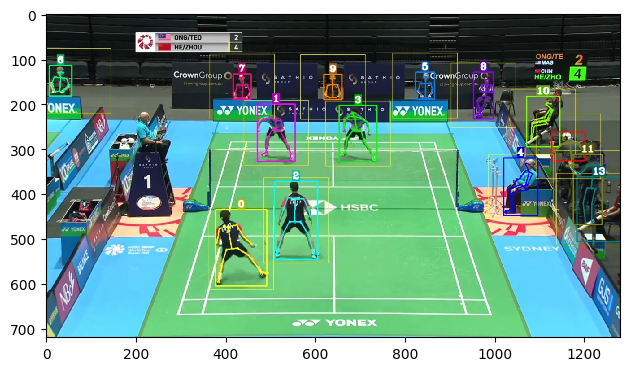

In [18]:
screen = imread('frame.png')
screen = resize(screen, (720, 1280),
                       anti_aliasing=True)
imshow(screen)

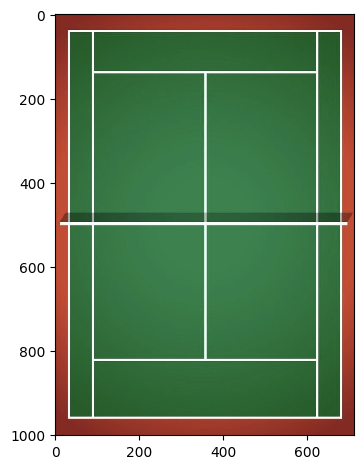

In [19]:
court = imread('/Users/mariakrylova/Documents/model/graph/norm_c.jpg')
imshow(court)

Text(0.5, 1.0, 'destination coordinates')

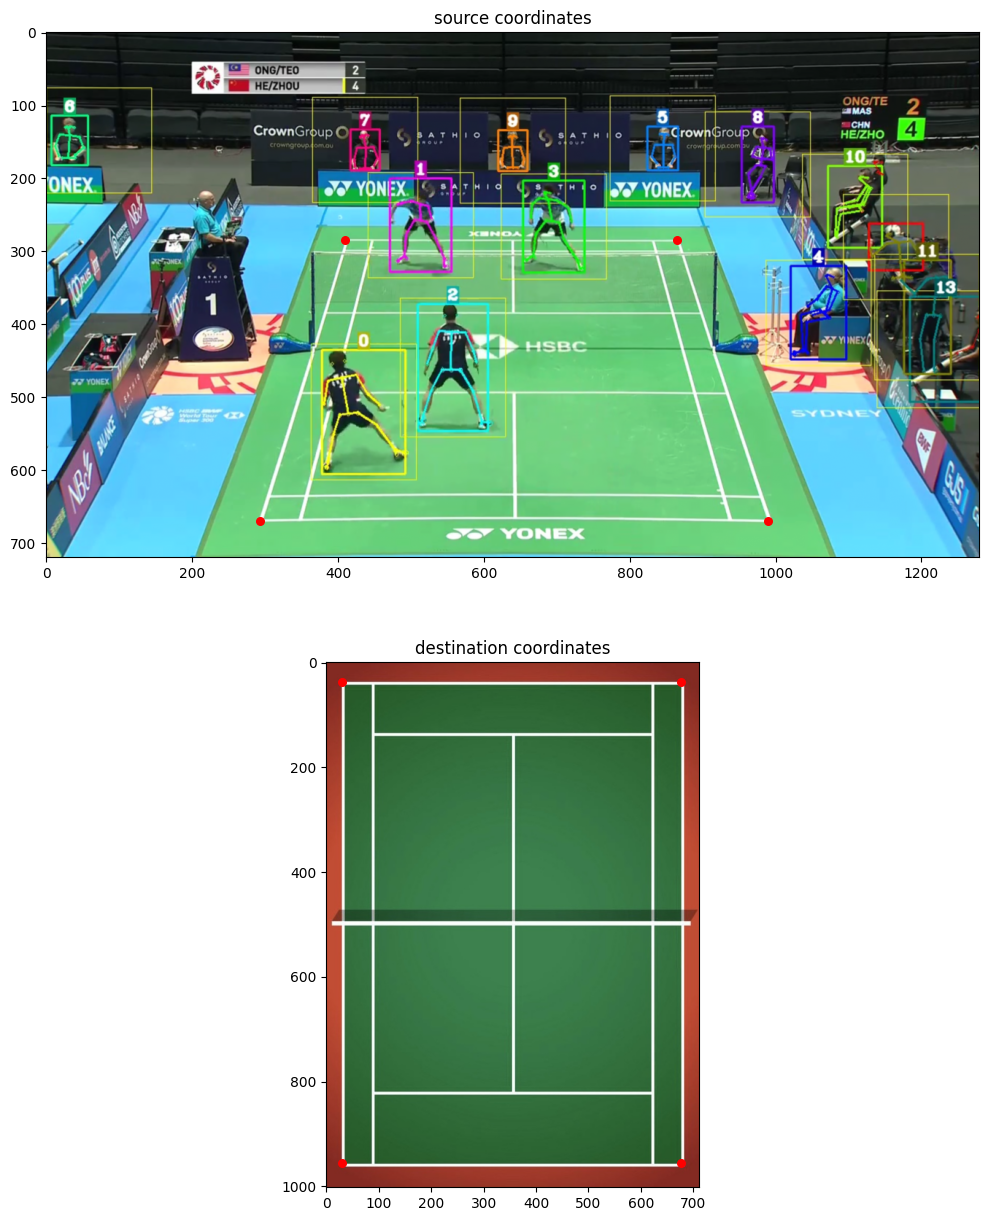

In [51]:
src_2 = np.array([410, 284, #left_up
                  865, 284, #right_up
                  293, 670, #left_down
                  990, 670,]).reshape((4, 2)) #right_down
dst_2 = np.array([30, 37,  #left_up
                  677, 37, #right_up
                  30, 955, #left_down
                  677, 955,]).reshape((4, 2)) #right_down

fig, ax = plt.subplots(2, 1, figsize=(25, 15))
ax[0].imshow(screen, )
ax[0].scatter(src_2[:,0], src_2[:,1], c='red', s=30)
ax[0].set_title('source coordinates')

ax[1].imshow(court)
ax[1].scatter(dst_2[:,0], dst_2[:,1], c='red', s=30)
ax[1].set_title('destination coordinates')

In [53]:
h, mask = cv.findHomography(src_2, dst_2, cv.RANSAC, 5.0)
h #homography matrix

array([[ 2.33617706e+00,  7.76028512e-01, -1.12893749e+03],
       [-2.83335700e-16,  6.06911003e+00, -1.66283970e+03],
       [-3.86477313e-19,  2.26375559e-03,  1.00000000e+00]])

Пример разделения поля на 12 участков для подсчета статистики.

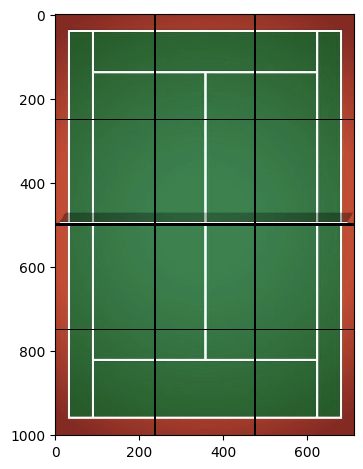

In [54]:
court_l = imread('/Users/mariakrylova/Documents/model/graph/norm_c.jpg')
cv.line(court_l, (0, 501), (712, 501), (0, 0, 0), thickness=5)
cv.line(court_l, (0, 250), (712, 250), (0, 0, 0), thickness=2)
cv.line(court_l, (0, 750), (712, 750), (0, 0, 0), thickness=2)
cv.line(court_l, (237, 0), (237, 1002), (0, 0, 0), thickness=2)
cv.line(court_l, (474, 0), (474, 1002), (0, 0, 0), thickness=2)
cv.imwrite('squared.jpg', court_l) 
imshow(court_l)

### Визуализация движения игроков:

In [ ]:
nums_track = [0, 2, 1,3]
time_start = 0
time_stop = 17

In [55]:
g_creator_ = Graph_creator(h, nums_track, j, time_start, time_stop)

Визуализация движения относительно кадра:

Step movement coordinates for track 0
Left leg, X position


/Users/mariakrylova/Documents/model/graph/Graph_creator.py:233: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels_x, fontsize = 10)


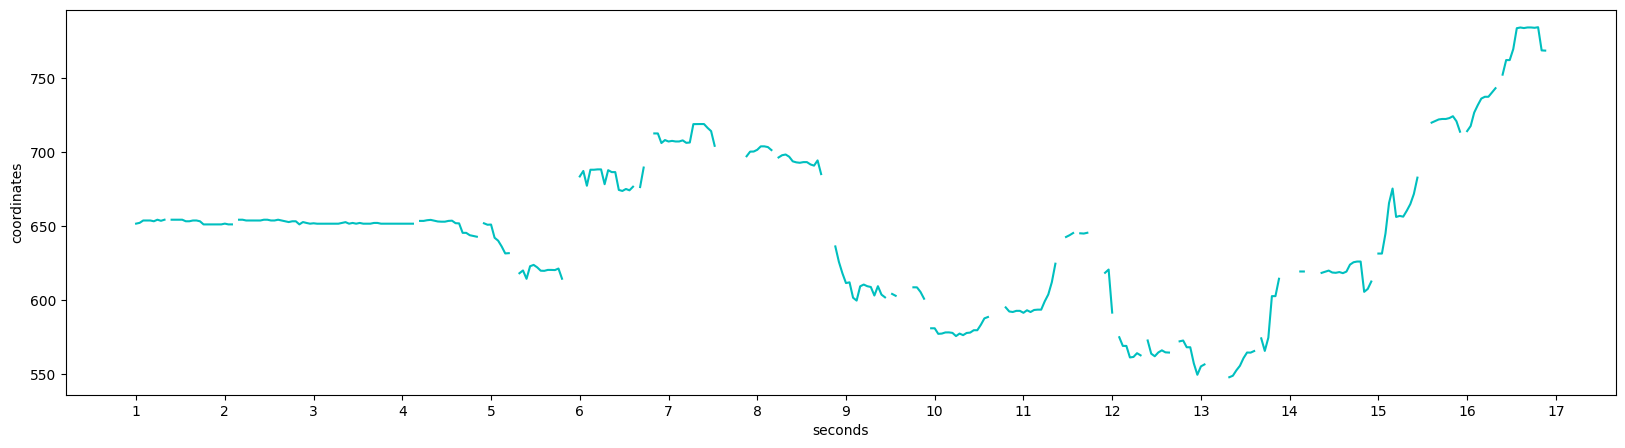

Right leg, X position


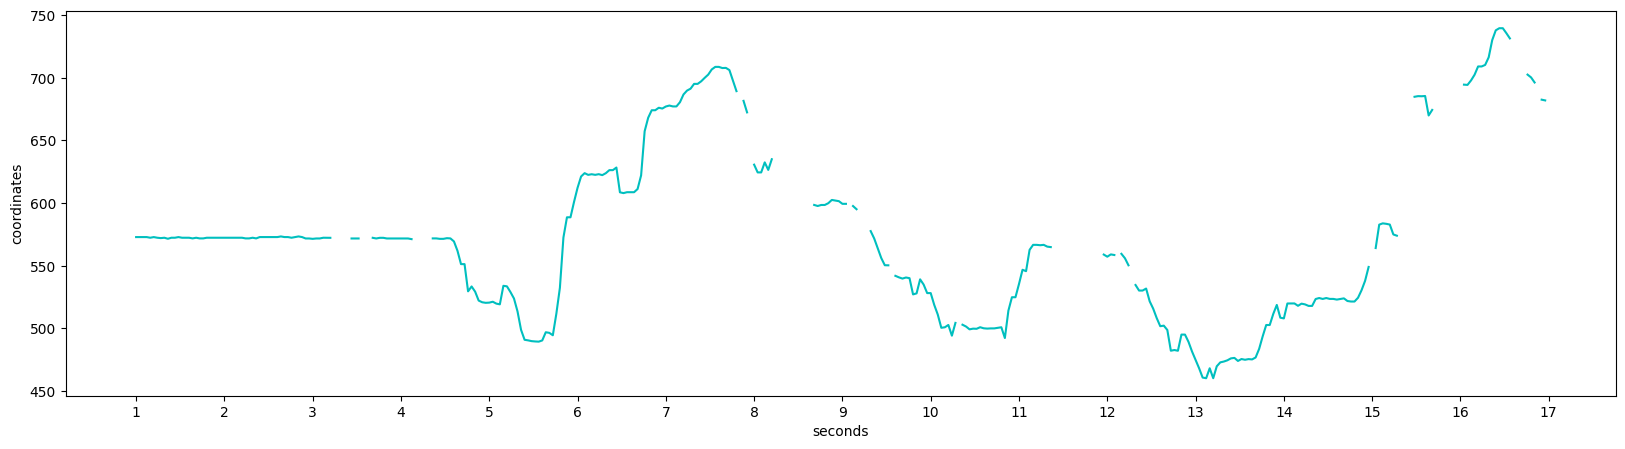

Left leg, Y position


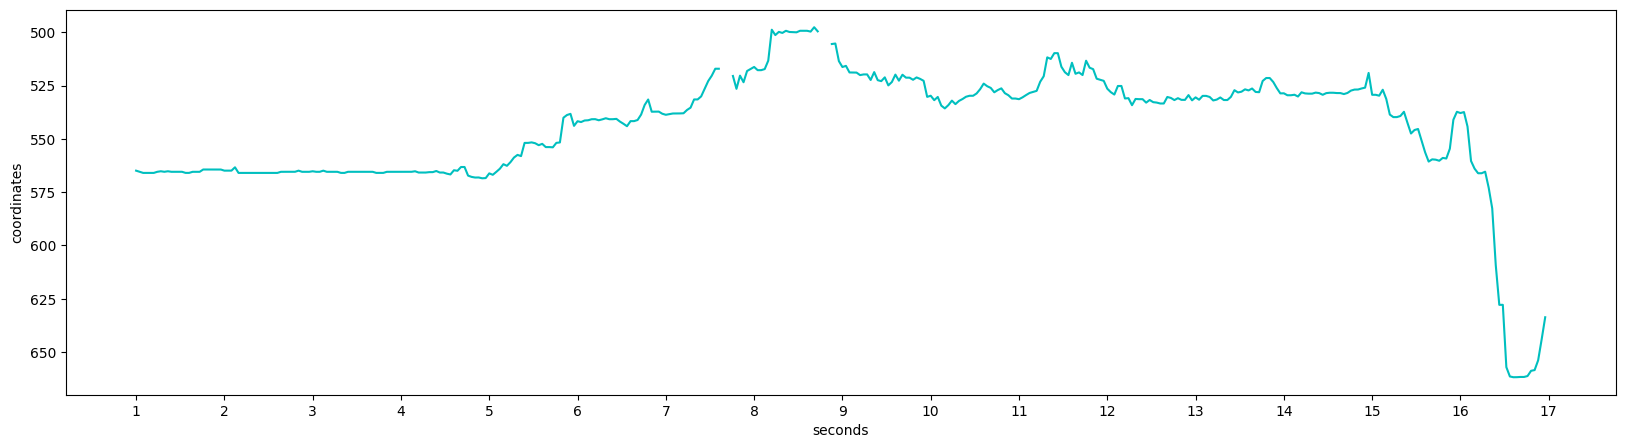

Right leg, Y position


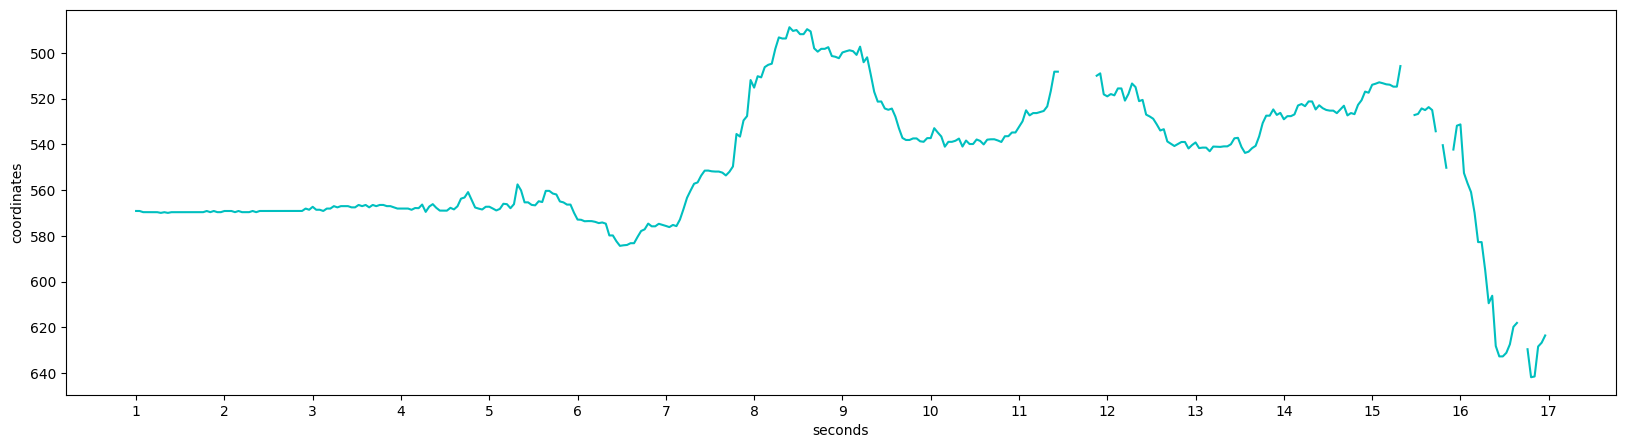

Step movement coordinates for track 2
Left leg, X position


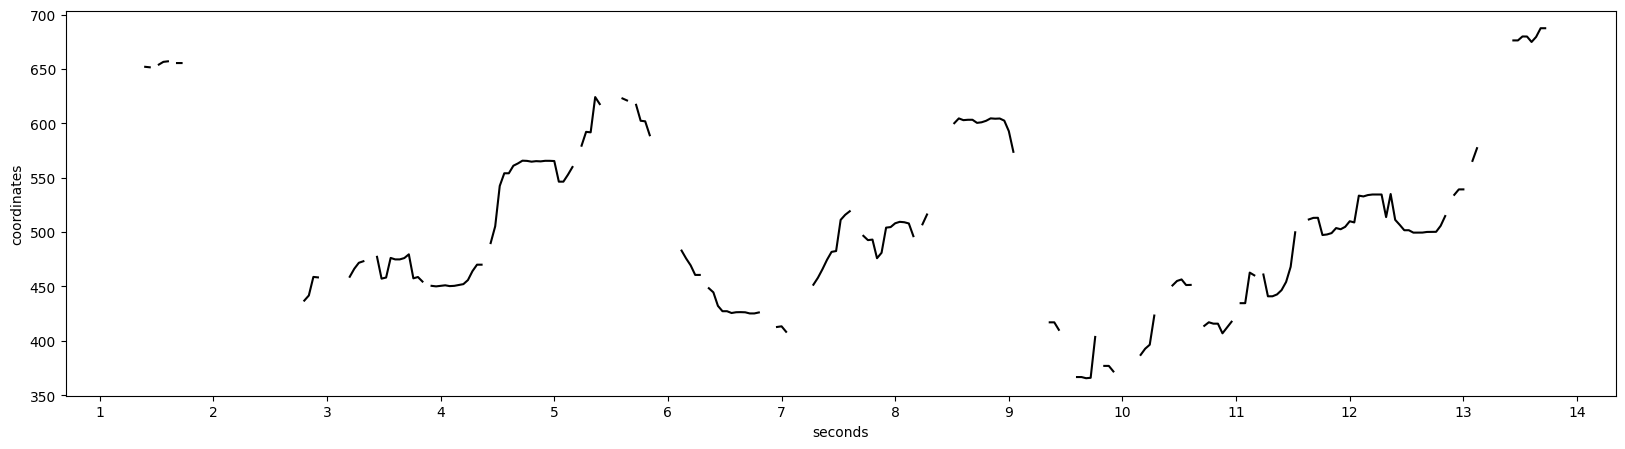

Right leg, X position


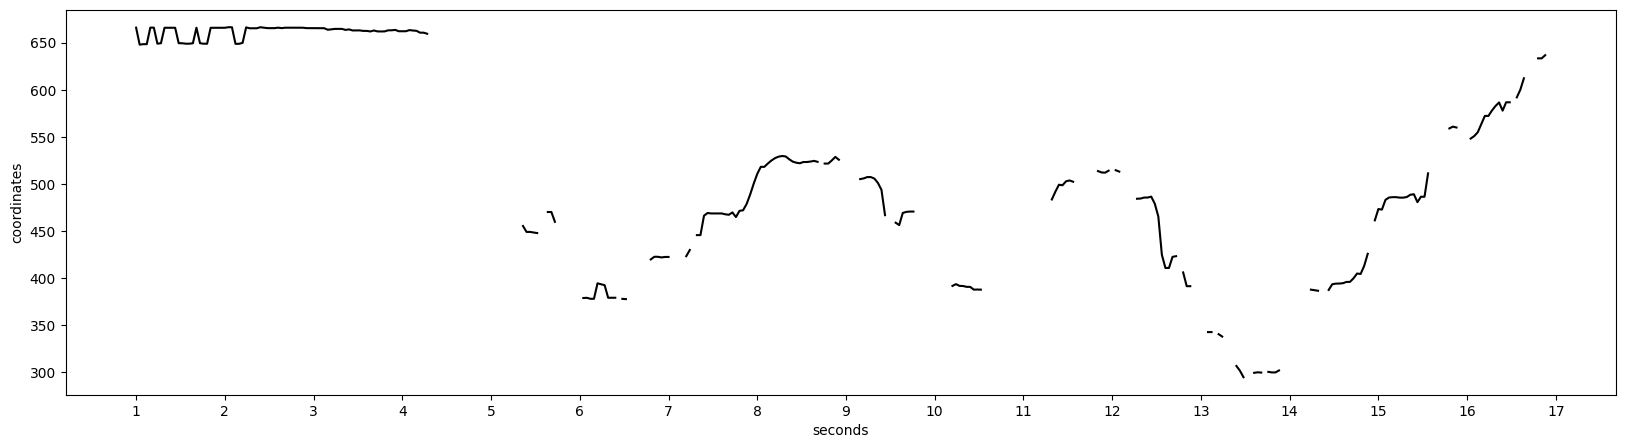

Left leg, Y position


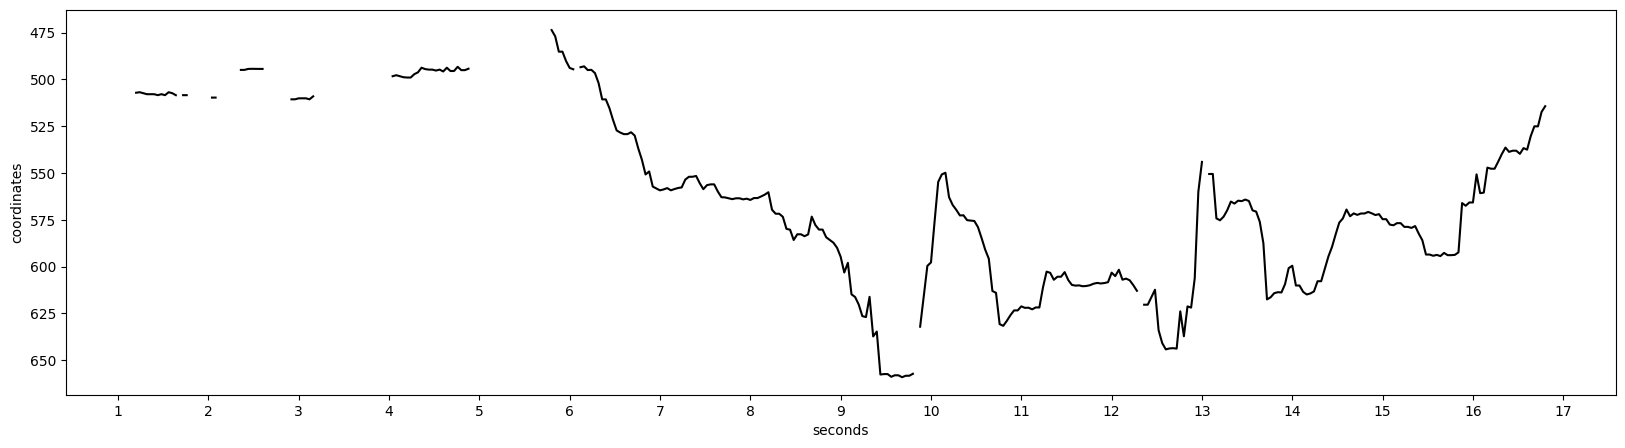

Right leg, Y position


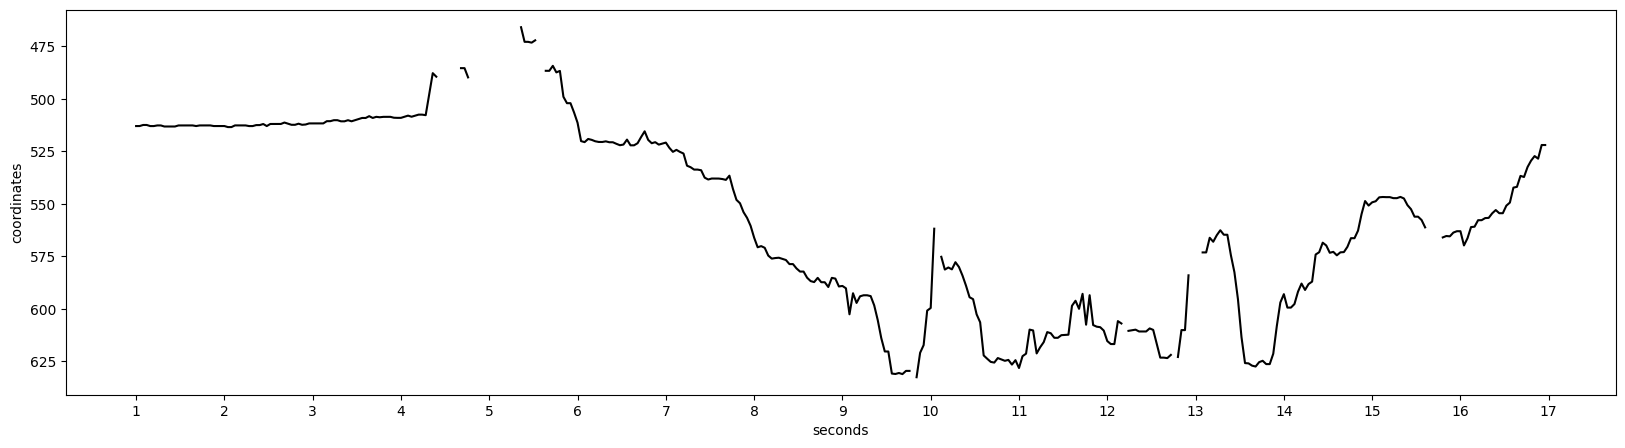

Step movement coordinates for track 1
Left leg, X position


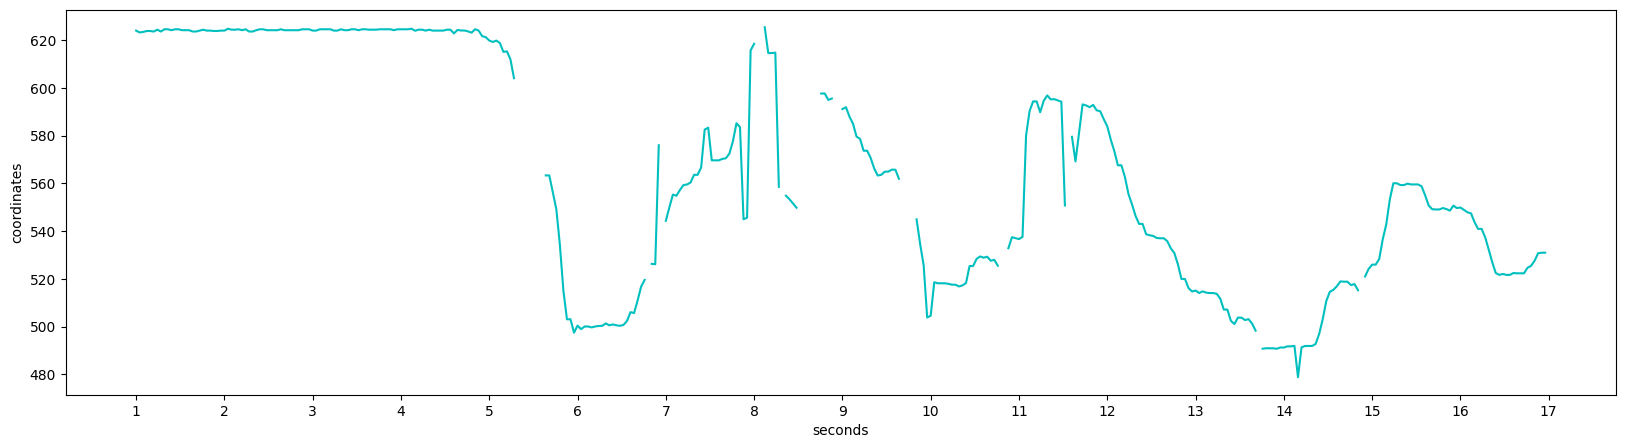

Right leg, X position


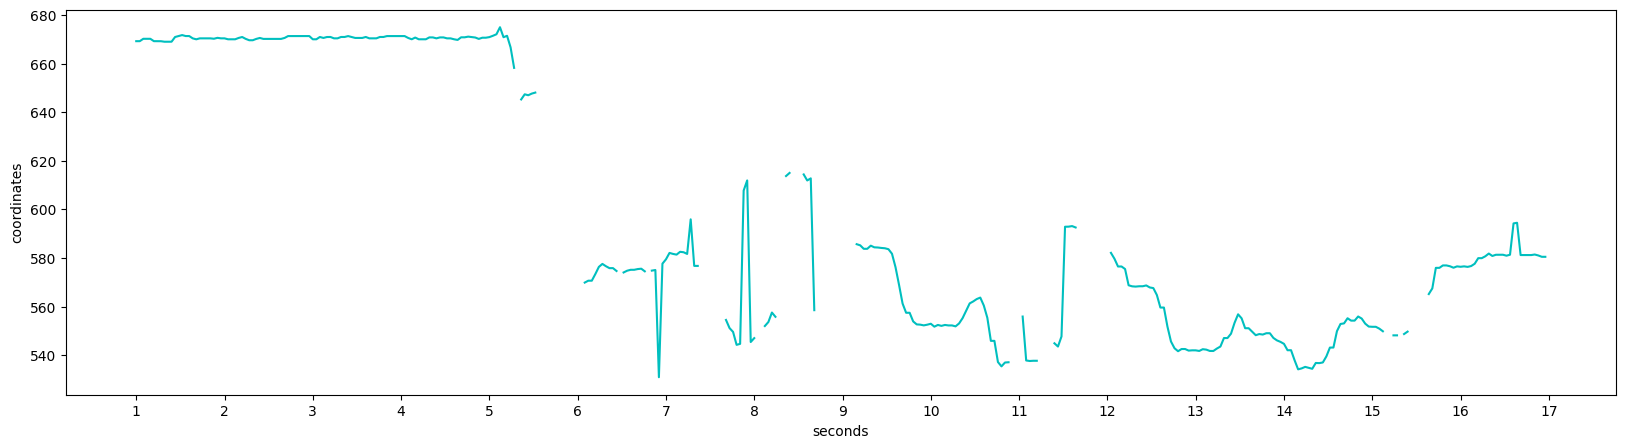

Left leg, Y position


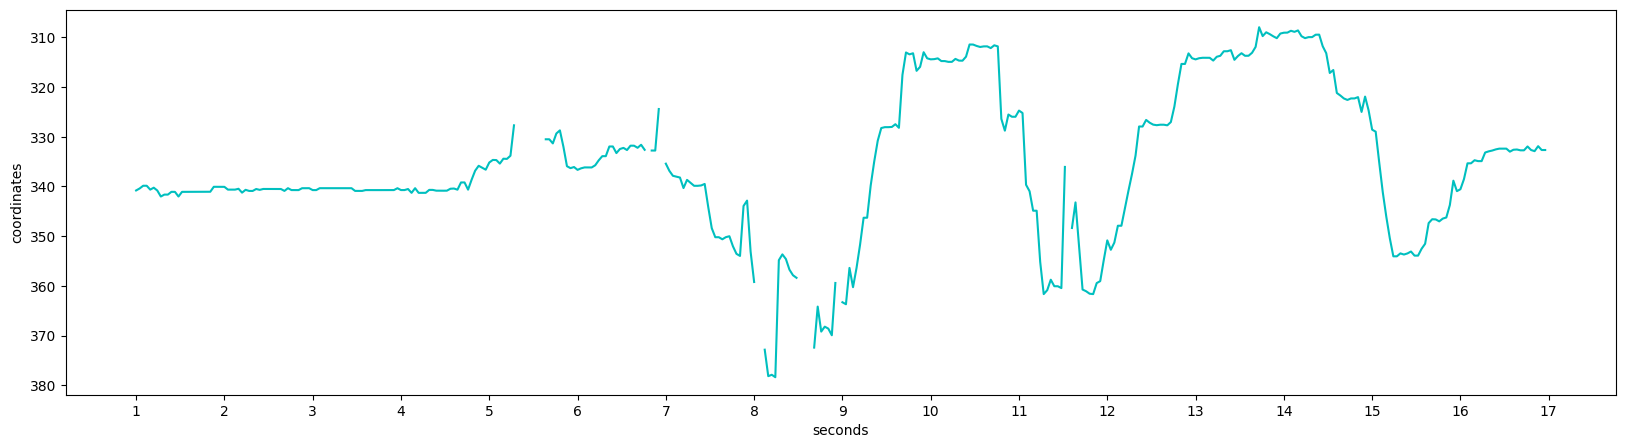

Right leg, Y position


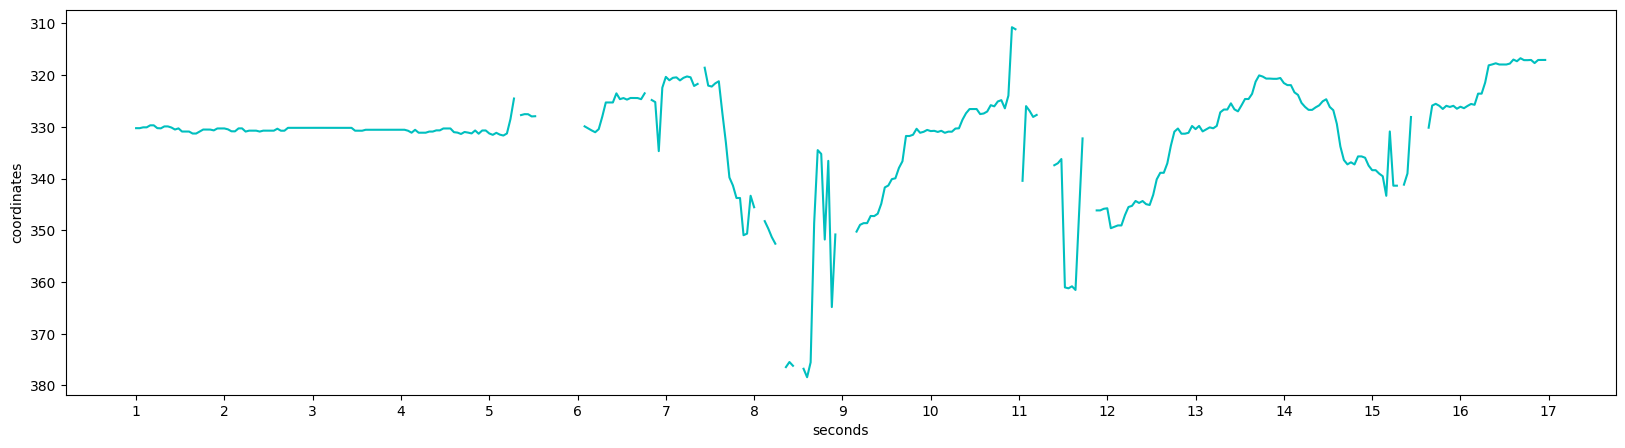

Step movement coordinates for track 3
Left leg, X position


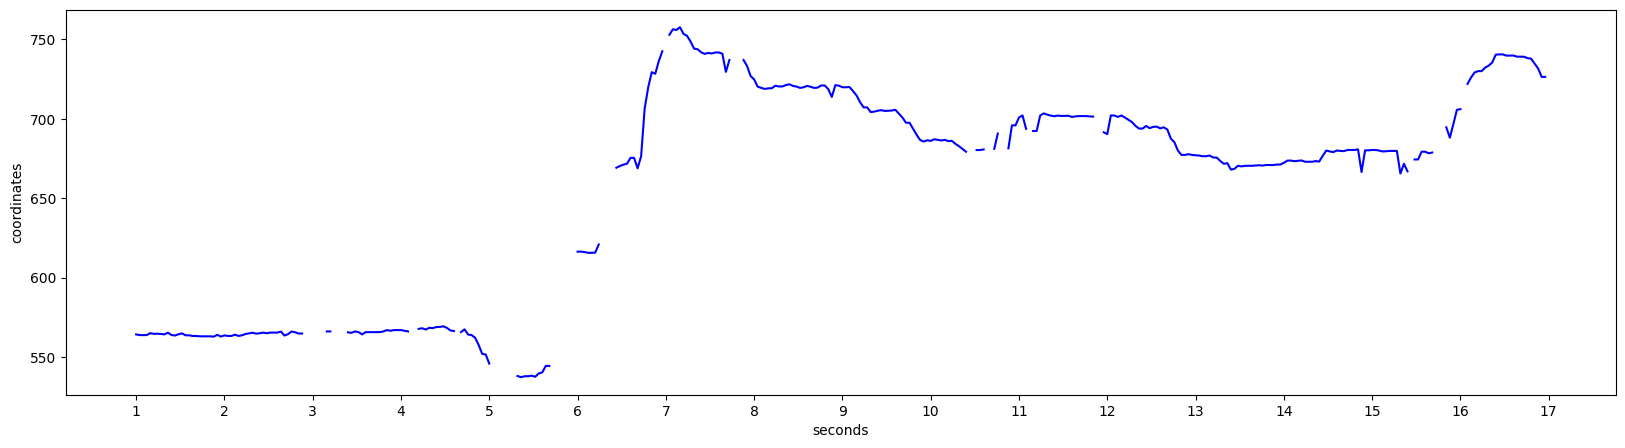

Right leg, X position


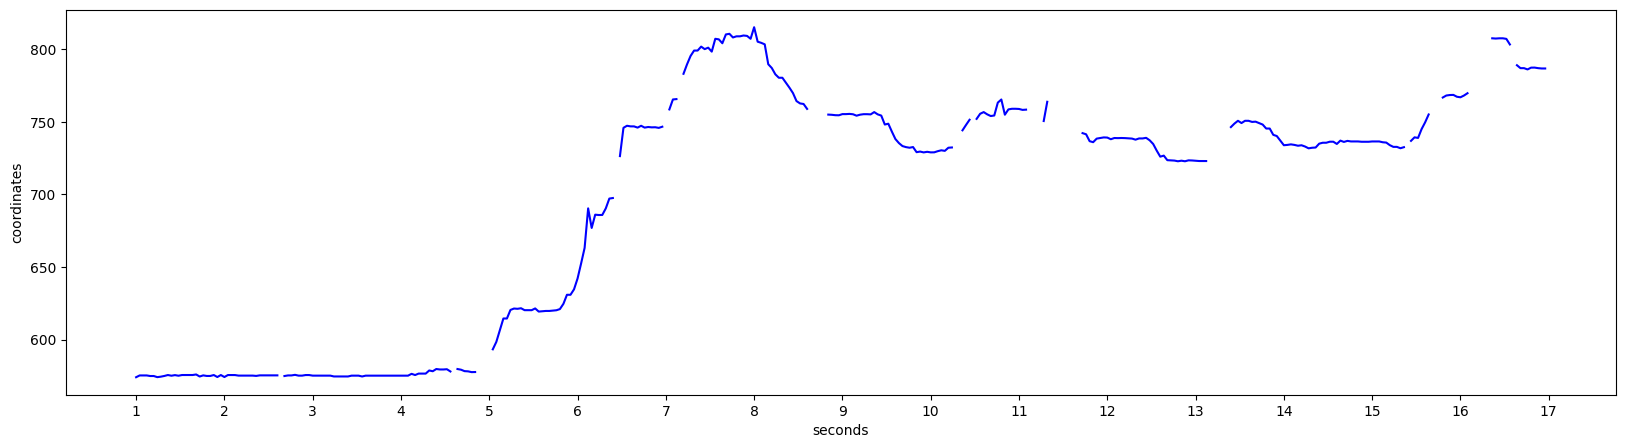

Left leg, Y position


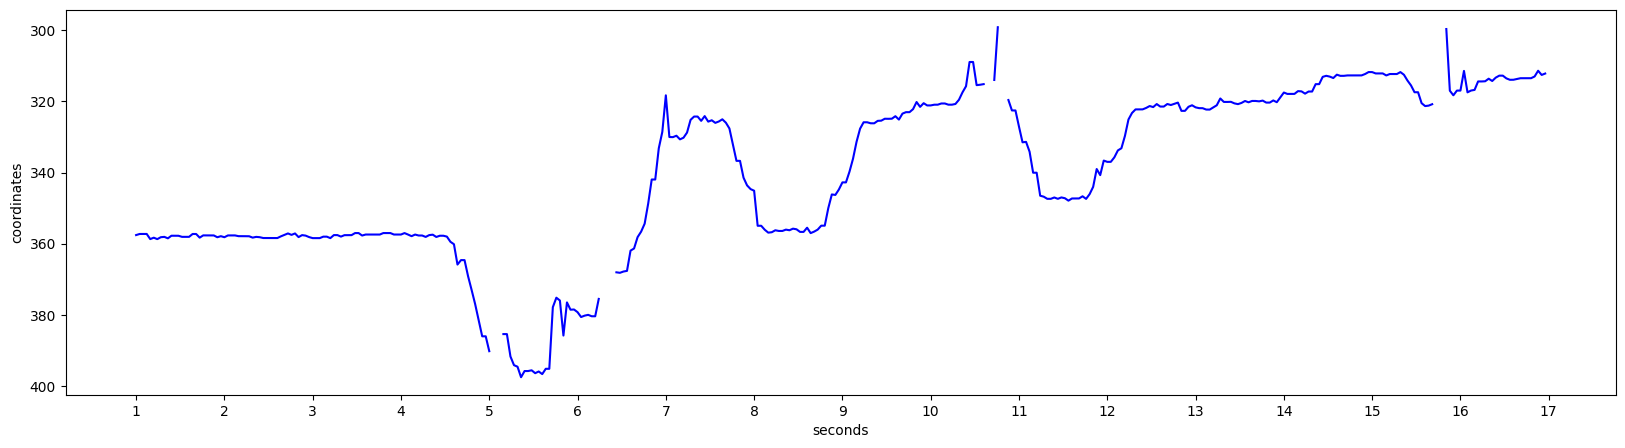

Right leg, Y position


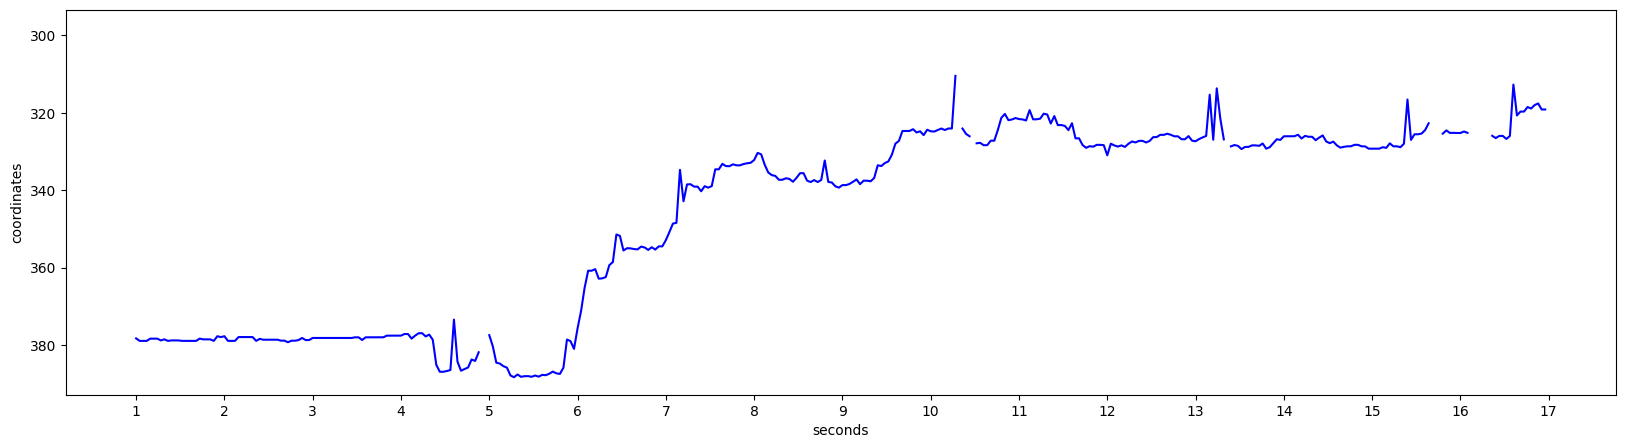

In [56]:
g_creator_.motion_relative_to_the_frame(save=True)

Визуализация циклограмм:

Cyclogram for track 0


/Users/mariakrylova/Documents/model/graph/Graph_creator.py:273: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels_x, fontsize = 10)


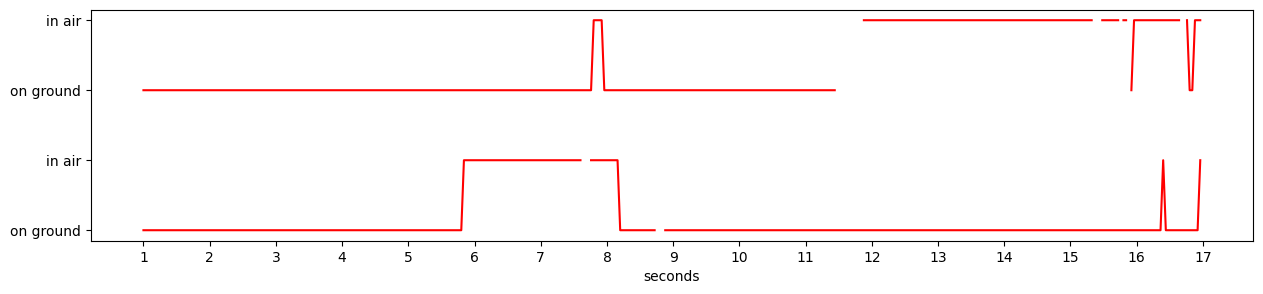

Cyclogram for track 2


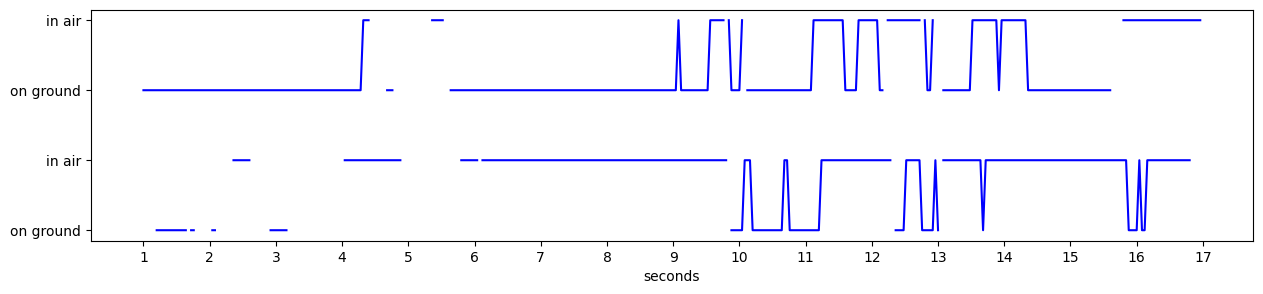

Cyclogram for track 1


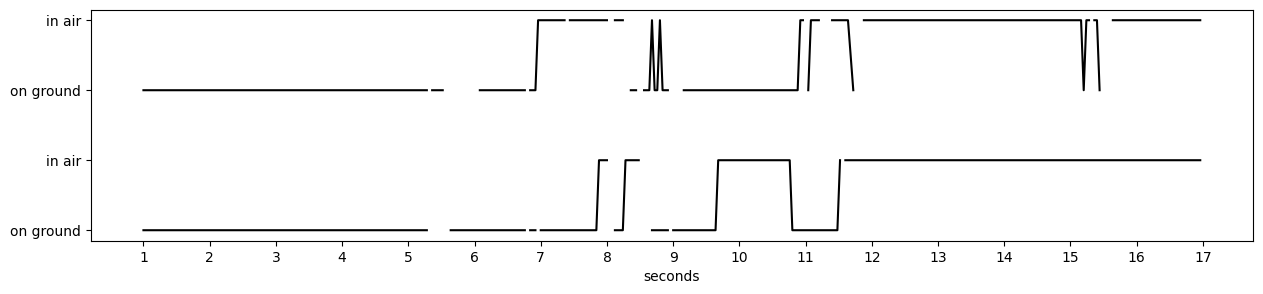

Cyclogram for track 3


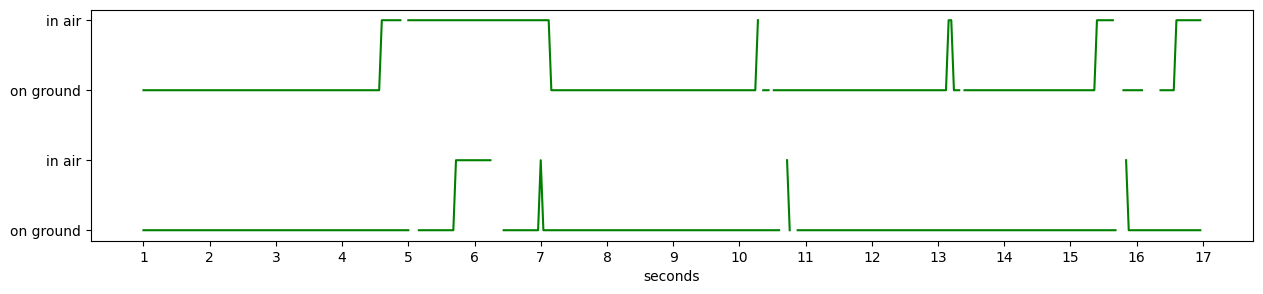

In [57]:
g_creator_.cyclogram(save=True)

Визауализация движения относительно поля:

In [58]:
g_creator_.movement_viz('/Users/mariakrylova/Documents/model/graph/norm_c.jpg', h)

bird view movement coordinates for track 0
Left leg, X position


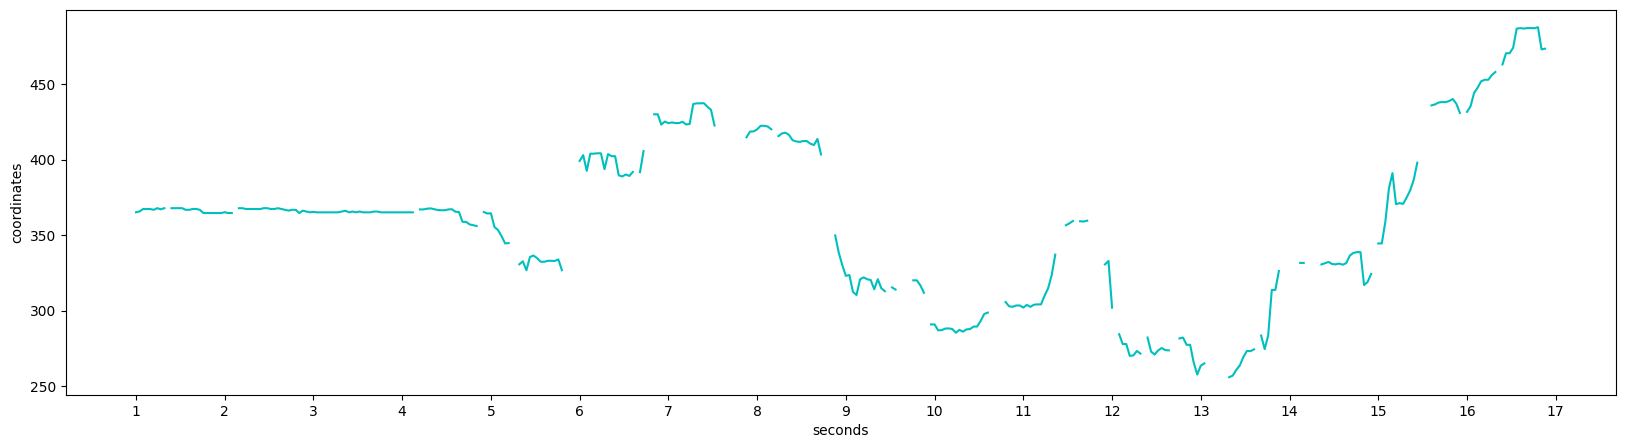

Right leg, X position


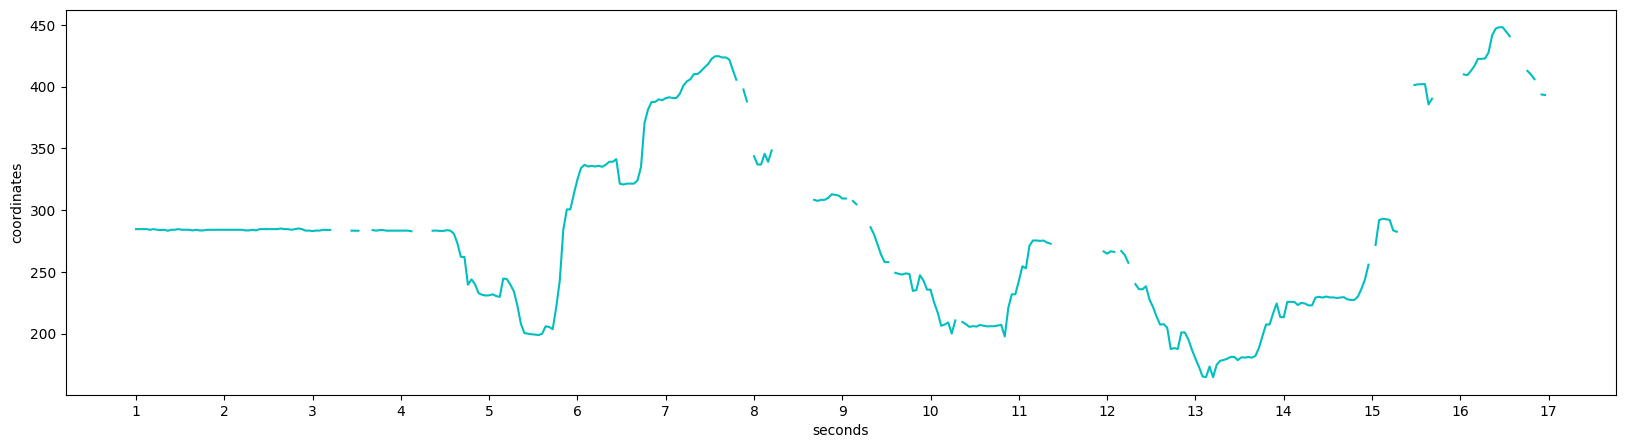

Left leg, Y position


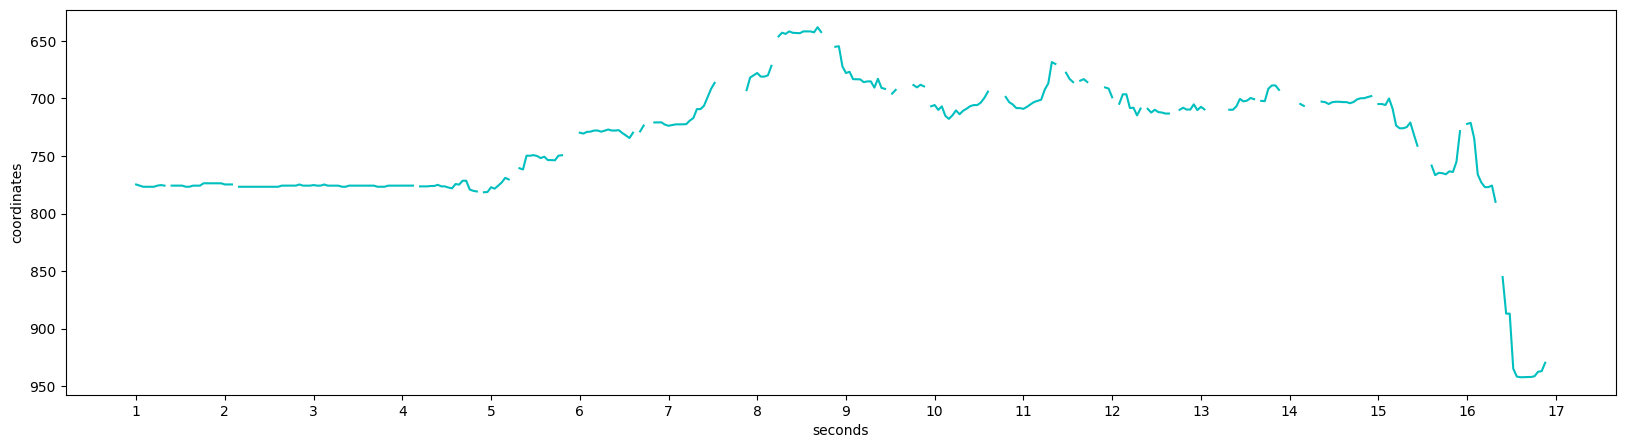

Right leg, Y position


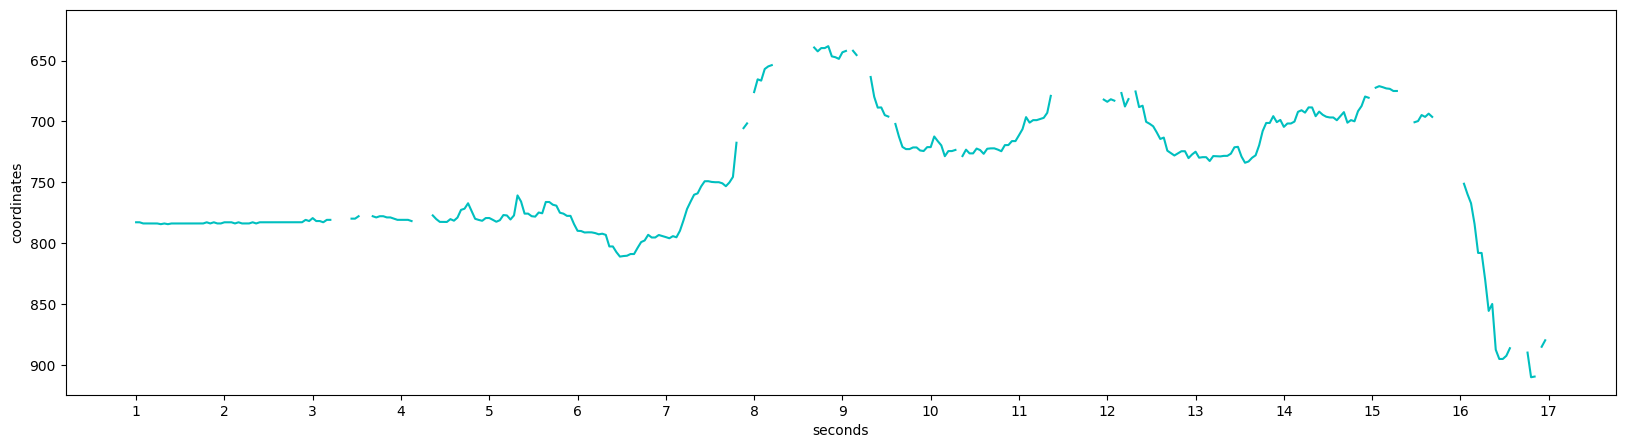

bird view movement coordinates for track 2
Left leg, X position


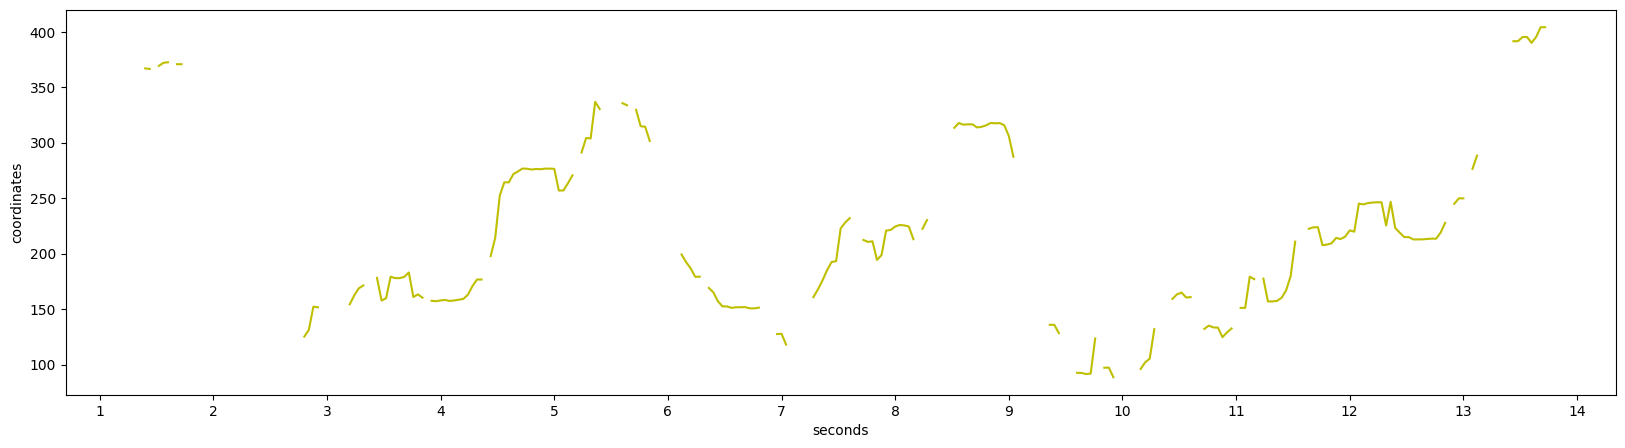

Right leg, X position


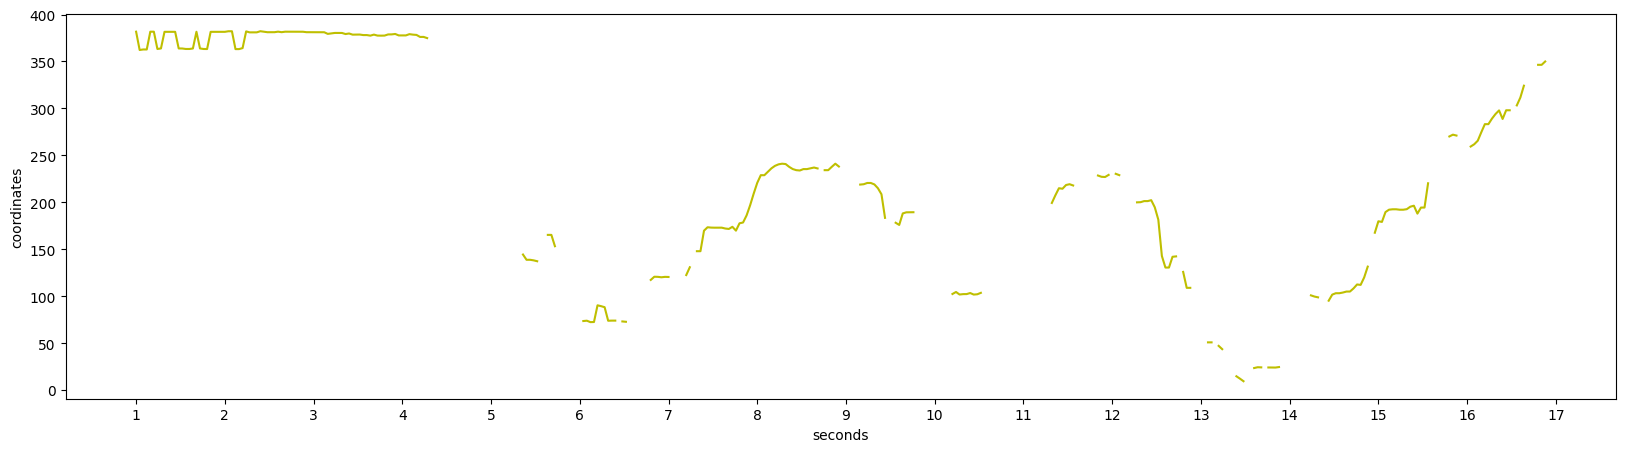

Left leg, Y position


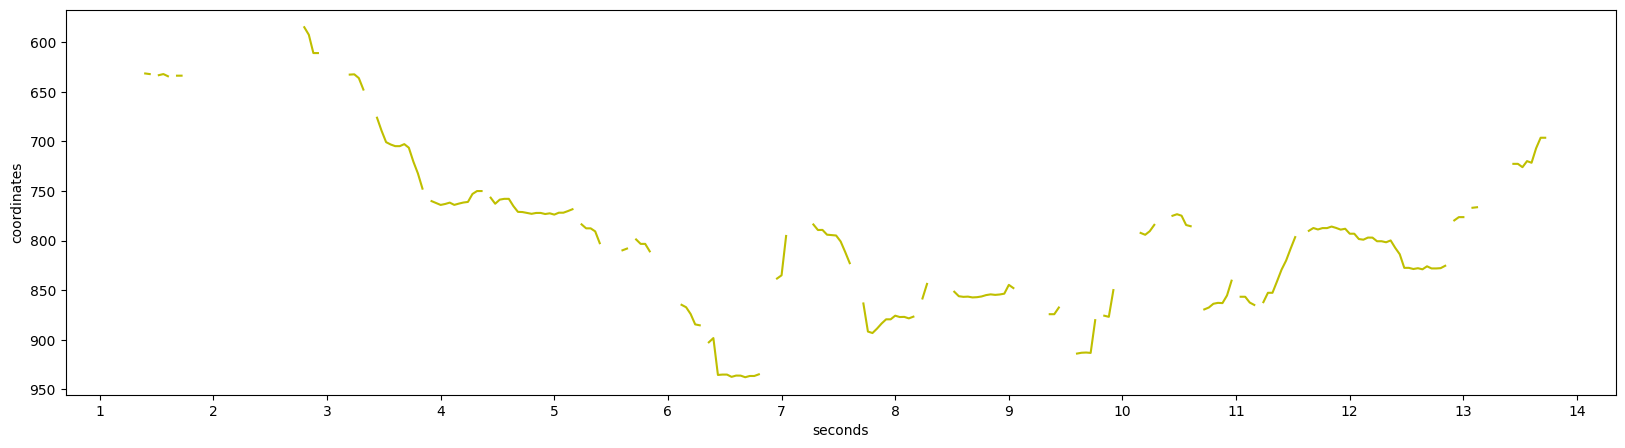

Right leg, Y position


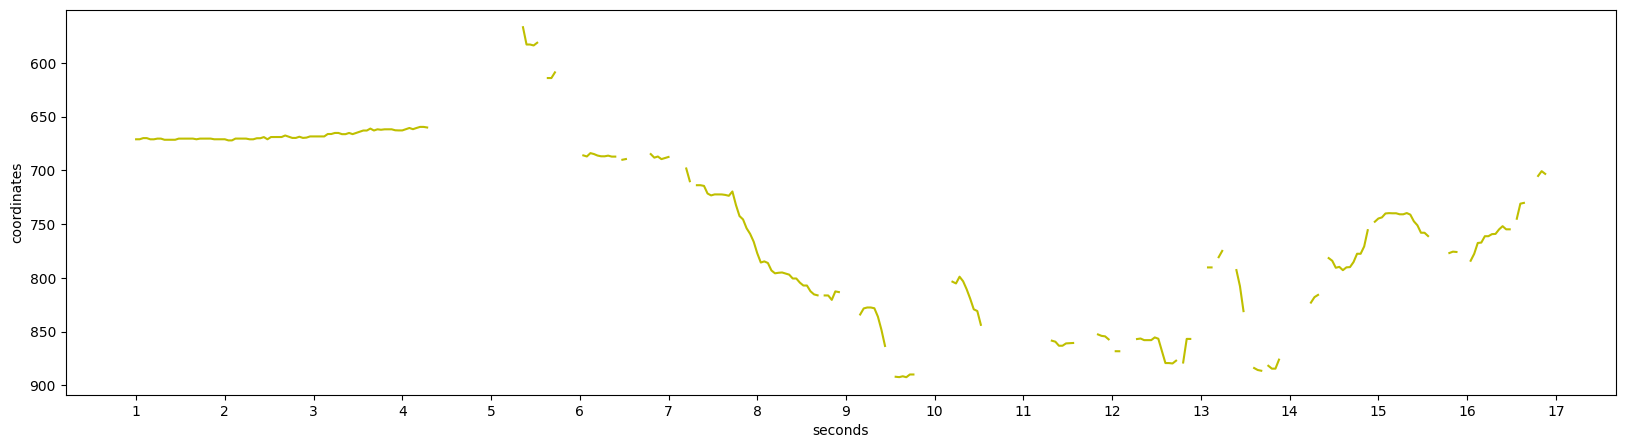

bird view movement coordinates for track 1
Left leg, X position


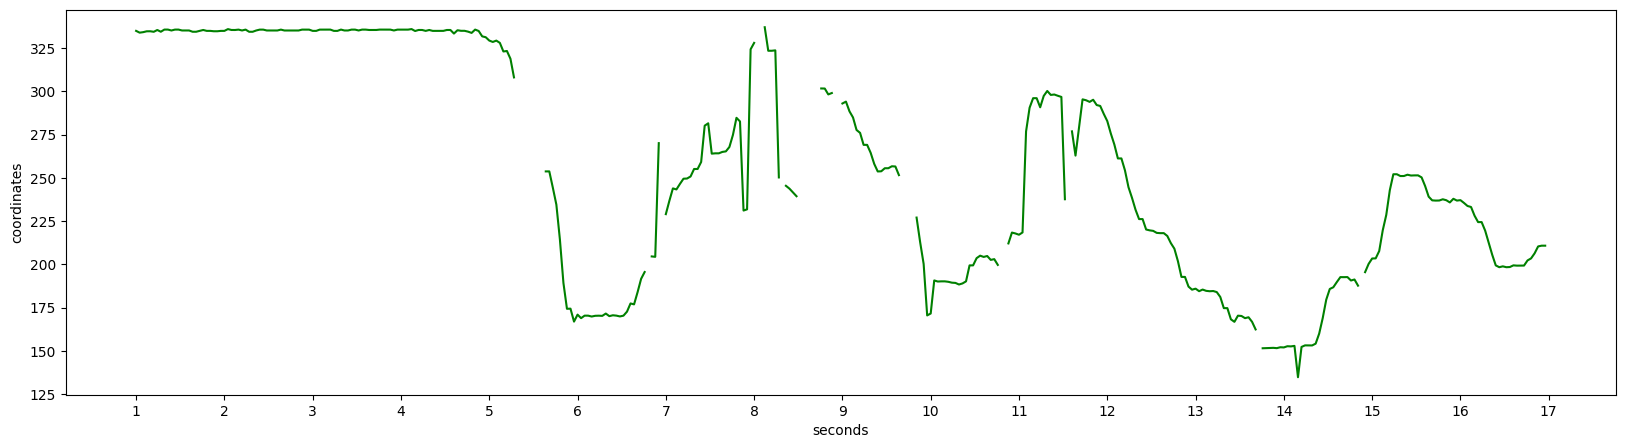

Right leg, X position


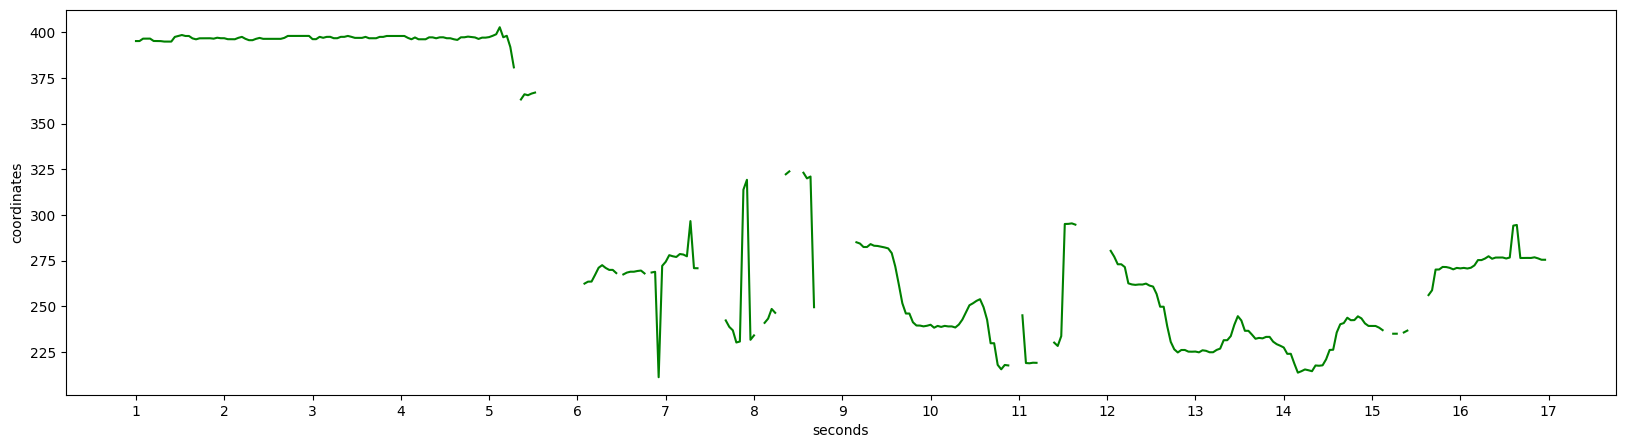

Left leg, Y position


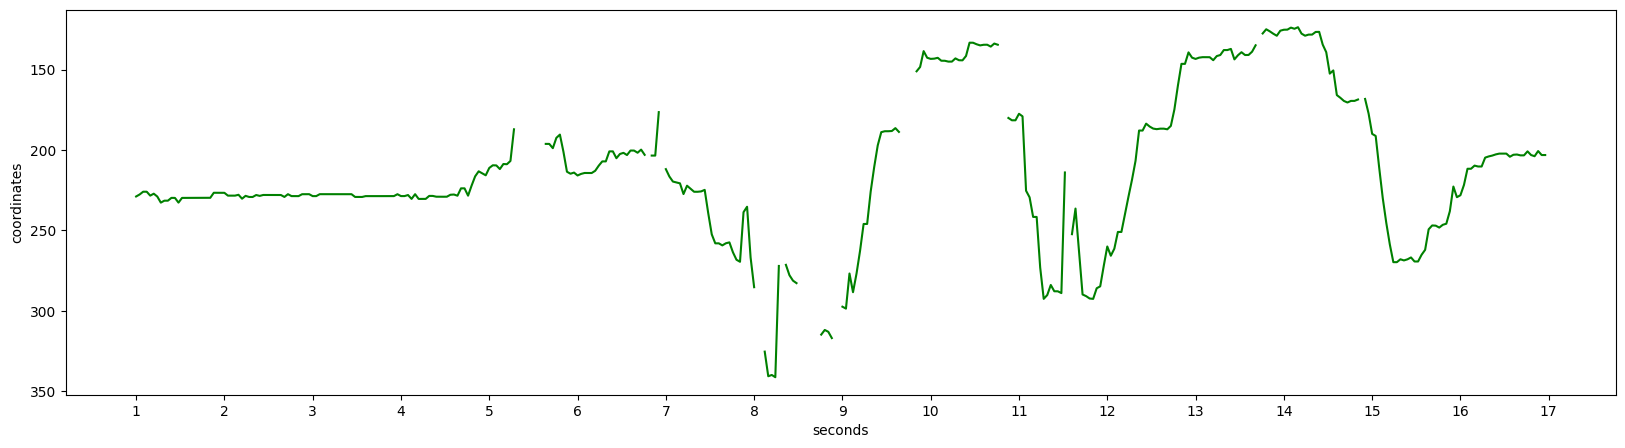

Right leg, Y position


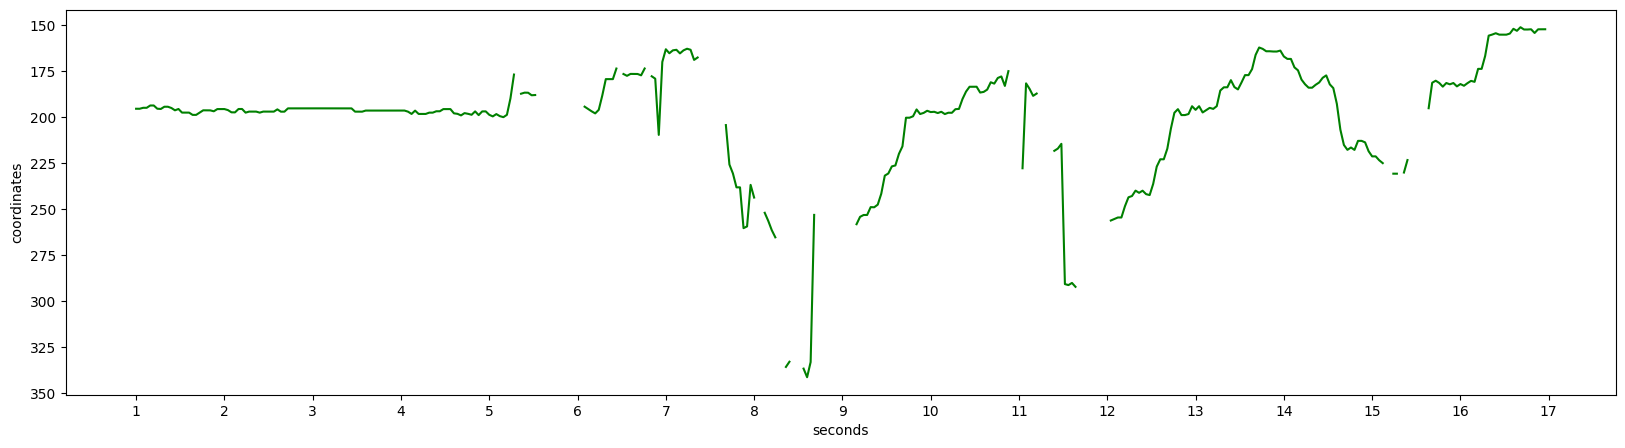

bird view movement coordinates for track 3
Left leg, X position


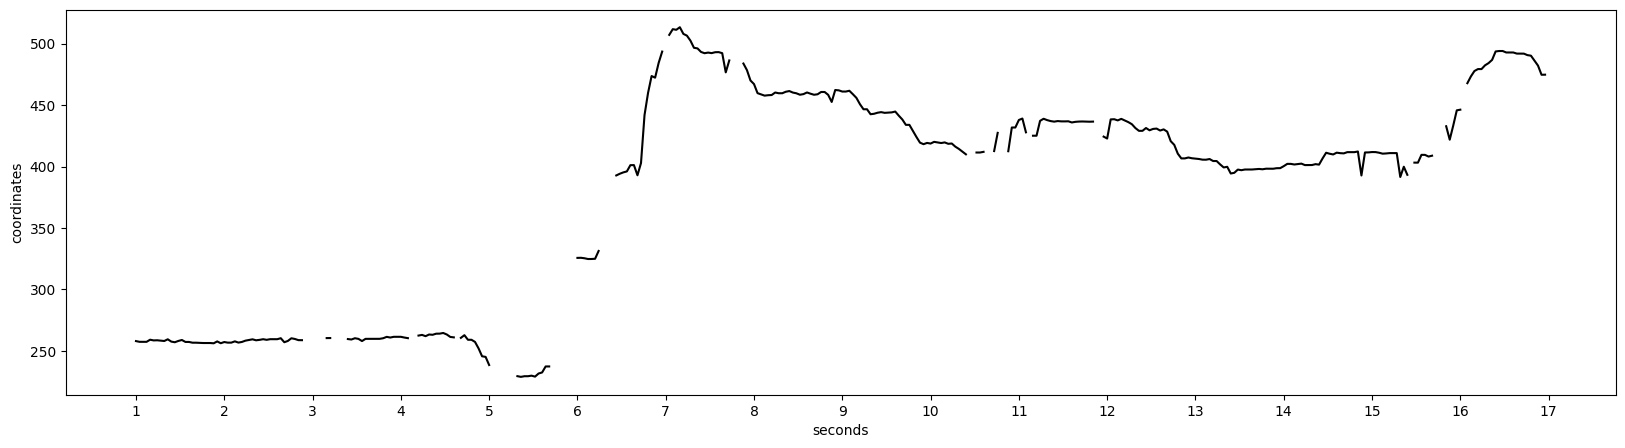

Right leg, X position


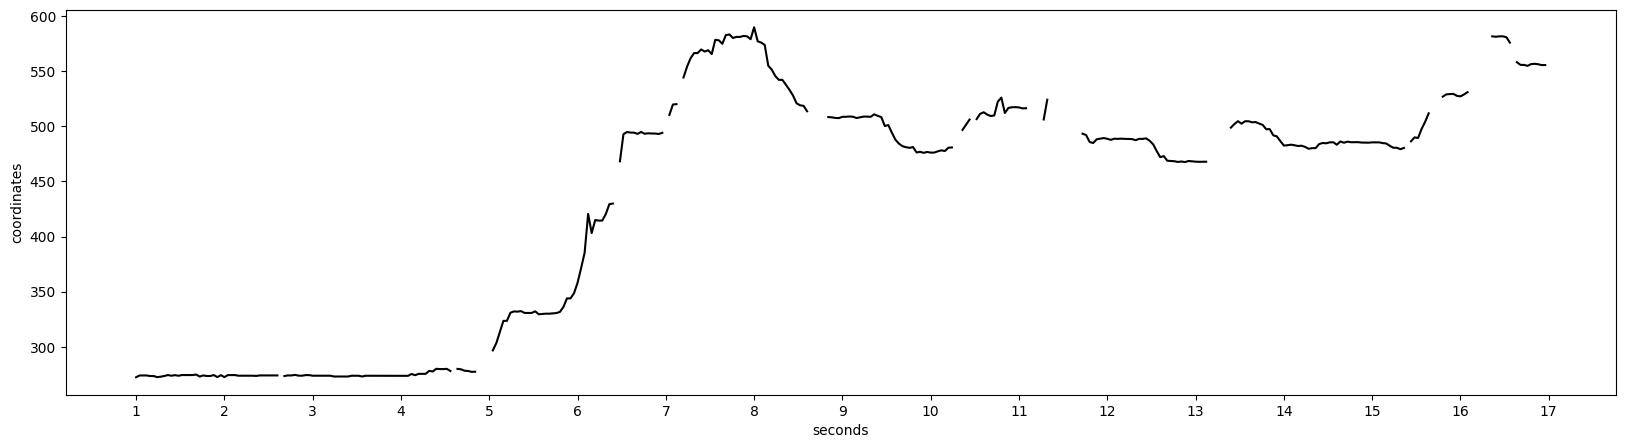

Left leg, Y position


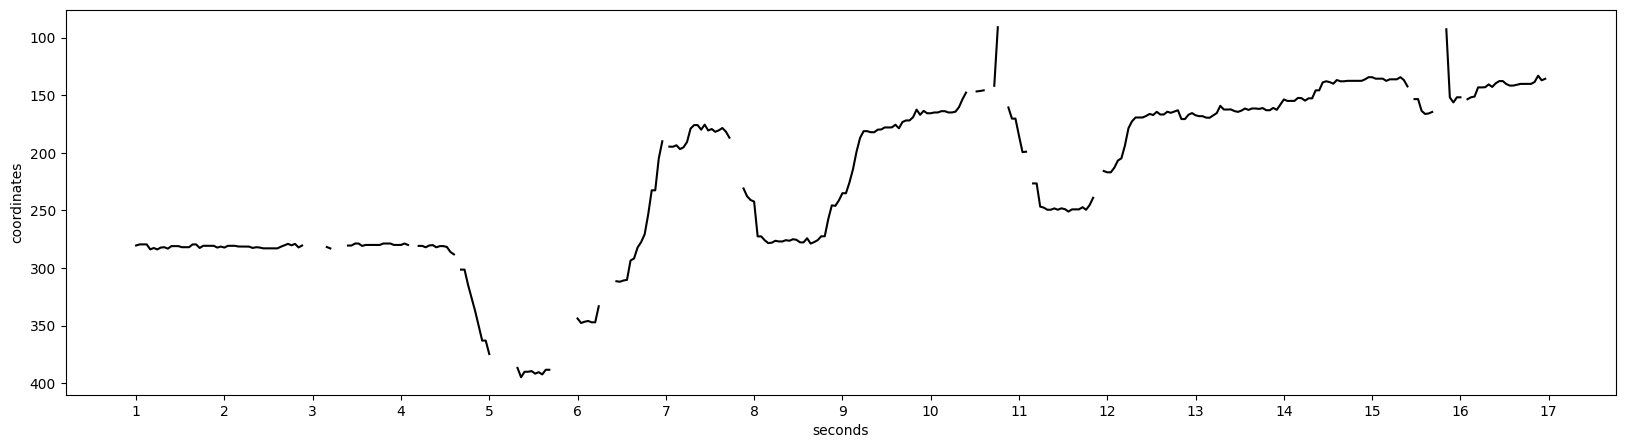

Right leg, Y position


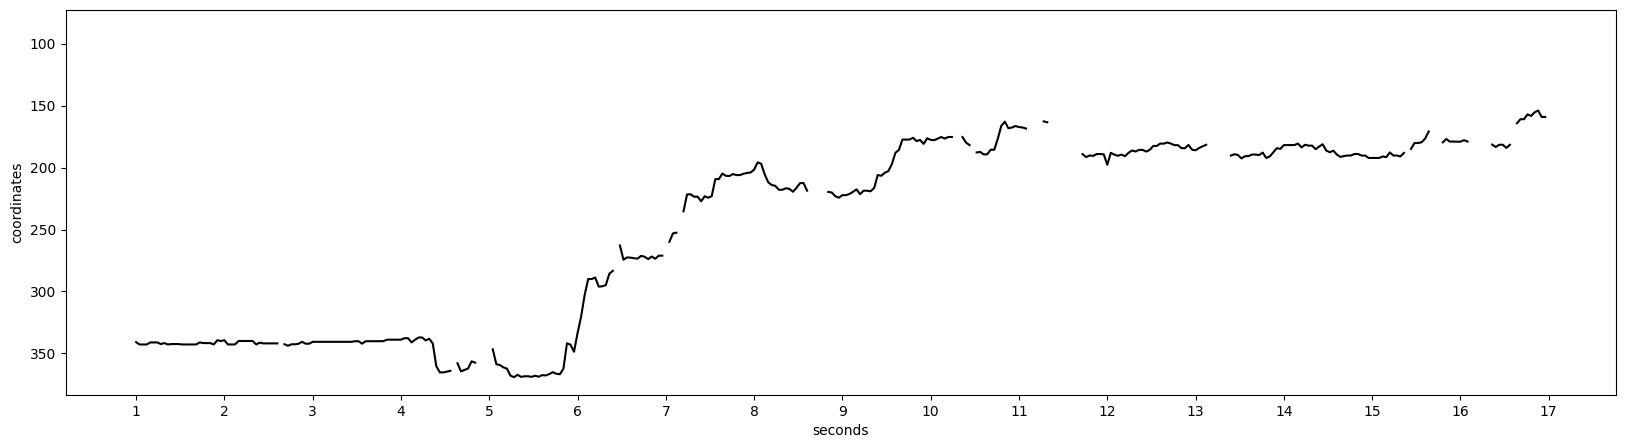

In [59]:
g_creator_.bird_view_gr(save=True)

Cоздание статистики:

In [62]:
a = g_creator_.square_stat()
df = pd.DataFrame(a, index=nums_track)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,90,277,0,20,283,8
2,0,0,0,0,0,0,78,106,0,236,79,0
1,229,390,0,0,88,0,0,0,0,0,0,0
3,0,186,240,9,262,15,0,0,0,0,0,0


In [63]:
df.to_csv("statistics.csv")